In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from toolkit.loaders.loader_eth import load_eth
import matplotlib.patches as mpathes
from sklearn.metrics import mean_squared_error
%pylab
%matplotlib inline

Using matplotlib backend: QtAgg
Populating the interactive namespace from numpy and matplotlib


In [386]:
# groups = np.loadtxt(os.path.join("./", "datasets/ETH/seq_eth/groups.txt"))
# neg_data = np.genfromtxt(os.path.join("./", "datasets/ETH/seq_eth/groups.txt"),delimiter = '\n')
# neg_data
# s = set()
# with open (os.path.join("./", "datasets/ETH/seq_eth/groups.txt")) as f:
#     for line in f.readlines():
        


In [387]:
!pip3 install sklearn

In [388]:

# fixme: replace OPENTRAJ_ROOT with the address to root folder of OpenTraj
traj_dataset = load_eth(os.path.join("./", "dataset/ETH/seq_eth/obsmat.txt"))
trajs = traj_dataset.get_trajectories()


In [389]:
os.listdir()

['datas_train.csv',
 'obsmat.txt',
 '.ipynb_checkpoints',
 'toolkit',
 'Pedestrian_trajectory.ipynb',
 'cleaned_pedestrian_trajs',
 'dataset',
 'cleaned_pedestrian_trajs.csv',
 'kalman.ipynb']

In [390]:
def concat(trajs):
    
    trajs = list(trajs)
    df = trajs[0][1]
    
    for i in range(1, len(trajs)):
        df = pd.concat([df, trajs[i][1]], axis = 0)
    return df
df = concat(trajs)
df

frame_id  agent_id      pos_x     pos_y     vel_x     vel_y  scene_id  \
0          780         1   8.456844  3.588066  1.671714  0.176292         0   
1          786         1   9.125530  3.658583  1.662877  0.326723         0   
2          792         1   9.787146  3.849445  1.683334  0.371084         0   
3          798         1  10.472197  3.955450  1.598568  0.264795         0   
4          804         1  11.066000  4.061280  1.574526  0.456390         0   
...        ...       ...        ...       ...       ...       ...       ...   
8879     12357       367  11.201661  8.443910  0.000000  0.000000         0   
8886     12363       367  11.201661  8.443910  0.000000  0.000000         0   
8892     12369       367  11.201661  8.443910  0.000000  0.000000         0   
8898     12375       367  11.201661  8.443910  0.000000  0.000000         0   
8904     12381       367  11.201661  8.443910  0.000000  0.000000         0   

           label  timestamp  
0     pedestrian       52.0  
1     pedestrian       52.4  
2     pedestrian       52.8  
3     pedestrian       53.2  
4     pedestrian       53.6  
...          ...        ...  
8879  pedestrian      823.8  
8886  pedestrian      824.2  
8892  pedestrian      824.6  
8898  pedestrian      825.0  
8904  pedestrian      825.4  

[8908 rows x 9 columns]

In [391]:
df = df.drop(["frame_id", "scene_id", "label"], axis=1)
df

agent_id      pos_x     pos_y     vel_x     vel_y  timestamp
0            1   8.456844  3.588066  1.671714  0.176292       52.0
1            1   9.125530  3.658583  1.662877  0.326723       52.4
2            1   9.787146  3.849445  1.683334  0.371084       52.8
3            1  10.472197  3.955450  1.598568  0.264795       53.2
4            1  11.066000  4.061280  1.574526  0.456390       53.6
...        ...        ...       ...       ...       ...        ...
8879       367  11.201661  8.443910  0.000000  0.000000      823.8
8886       367  11.201661  8.443910  0.000000  0.000000      824.2
8892       367  11.201661  8.443910  0.000000  0.000000      824.6
8898       367  11.201661  8.443910  0.000000  0.000000      825.0
8904       367  11.201661  8.443910  0.000000  0.000000      825.4

[8908 rows x 6 columns]

In [392]:
# data_txt = np.loadtxt(os.path.join("./", "datasets/ETH/seq_eth/obsmat.txt"))
# data_txt_df = pd.DataFrame(data_txt)
# data_txt_df.to_csv('datas_train.csv', index=False)

In [393]:
# df = pd.read_csv("./datas_train.csv")
# df

In [394]:
# df = df.drop("3" ,axis = 1)
# df = df.drop("6", axis = 1)
# df = df.drop("0", axis = 1)


In [395]:
# df.rename(columns= {'1':"pedestrian_id", "2":"pos_x", "4":"pos_y", "5":"v_x", "7":"v_y"}, inplace=True)
# df

In [396]:
x_y = df[["pos_x", "pos_y"]]
x_y_matrix = np.array(x_y)

x_y_matrix

array([[ 8.4568443,  3.5880664],
       [ 9.1255301,  3.6585832],
       [ 9.787146 ,  3.8494445],
       ...,
       [11.201661 ,  8.4439105],
       [11.201661 ,  8.4439105],
       [11.201661 ,  8.4439105]])

In [397]:
# import os
# import numpy as np

# def world2image(traj_w, H_inv):    
#     # Converts points from Euclidean to homogeneous space, by (x, y) → (x, y, 1)
#     traj_homog = np.hstack((traj_w, np.ones((traj_w.shape[0], 1)))).T  
#     # to camera frame
#     traj_cam = np.matmul(H_inv, traj_homog)  
#     # to pixel coords
#     traj_uvz = np.transpose(traj_cam/traj_cam[2]) 
#     return traj_uvz[:, :2].astype(int)    

# H = (np.loadtxt(os.path.join("./", "dataset/ETH/seq_eth/H.txt")))
# H_inv = np.linalg.inv(H)
# word_pos = world2image(x_y_matrix, H_inv)  # TRAJ: Tx2 numpy array

In [398]:
# df["pos_x"] = word_pos[...,0]
# df["pos_y"] = word_pos[...,1]

In [399]:
x_min = df["pos_x"].min()
y_min = df["pos_y"].min()
x_max = df["pos_x"].max()
y_max = df["pos_y"].max()
print(x_min)
print(x_max)
print(y_min)
print(y_max)

-7.4461977
13.868879
-3.270521
13.287946


In [400]:
df_1 = df[df["agent_id"].isin([1,2])]
df_1

agent_id      pos_x     pos_y     vel_x     vel_y  timestamp
0           1   8.456844  3.588066  1.671714  0.176292       52.0
1           1   9.125530  3.658583  1.662877  0.326723       52.4
2           1   9.787146  3.849445  1.683334  0.371084       52.8
3           1  10.472197  3.955450  1.598568  0.264795       53.2
4           1  11.066000  4.061280  1.574526  0.456390       53.6
6           1  11.731818  4.320563  1.644127  0.544391       54.0
8           1  12.381302  4.496793  1.623709  0.440576       54.4
5           2  13.017548  5.782591 -2.324444 -0.076606       53.6
7           2  12.087770  5.751949 -1.589052 -0.065971       54.0
9           2  11.746306  5.729815 -1.140766  0.105373       54.4
10          2  11.175158  5.836247 -1.640021  0.179235       54.8
11          2  10.434290  5.873203 -1.406129  0.419050       55.2
13          2  10.050254  6.171487 -1.078742  0.455190       55.6
15          2   9.571296  6.237355 -1.207725  0.115437       56.0
19          2   9.084074  6.263836 -1.273181  0.170841       56.4
24          2   8.552751  6.374027 -1.232733  0.271502       56.8
29          2   8.097887  6.481037 -1.146730  0.217892       57.2
34          2   7.635367  6.548341 -1.163496  0.169306       57.6
39          2   7.167091  6.616482 -1.126493  0.116400       58.0
44          2   6.734173  6.641461 -1.030589  0.111754       58.4
49          2   6.342620  6.705885 -0.928381  0.158624       58.8
54          2   5.991468  6.768360 -0.931563  0.265376       59.2
59          2   5.597370  6.918186 -0.940001  0.267335       59.6
64          2   5.239467  6.982228 -0.727833  0.150307       60.0
69          2   5.015103  7.038432 -0.552344  0.300017       60.4
74          2   4.797592  7.222242 -0.588824  0.676791       60.8
79          2   4.544044  7.579865 -0.432141  0.454893       61.2
84          2   4.451879  7.586156 -0.429110 -0.345780       61.6
89          2   4.200756  7.303241 -0.529000 -0.071224       62.0
95          2   4.028679  7.529177 -0.368774  0.615098       62.4
101         2   3.905737  7.795320 -0.564664  0.361645       62.8
107         2   3.576947  7.818493 -0.817952  0.165903       63.2
114         2   3.251375  7.928042 -0.941012  0.229570       63.6
121         2   2.824138  8.002149 -1.138597  0.136249       64.0
128         2   2.340498  8.037041 -1.224827 -0.021810       64.4
135         2   1.844277  7.984702 -1.128275 -0.195546       64.8
142         2   1.437878  7.880604 -1.093270 -0.368433       65.2
149         2   0.969661  7.689956 -1.123340 -0.595632       65.6
154         2   0.539206  7.404099 -1.078292 -0.662784       66.0
159         2   0.107027  7.159728 -1.077654 -0.501264       66.4
164         2  -0.322917  7.003088 -0.983052 -0.800444       66.8
169         2  -0.679414  6.519373 -1.004938 -0.922421       67.2
174         2  -1.126867  6.265151 -1.053181 -0.584615       67.6
179         2  -1.521959  6.051681 -0.987730 -0.533675       68.0

In [401]:
# df_1.plot("pos_x", "pos_y", kind = "scatter")

In [402]:
# df_2 = df[df["agent_id"].isin([2])]
# df_2.plot("pos_x", "pos_y", kind = "scatter")

In [403]:
multi_trajs = df.groupby("agent_id")
list(multi_trajs)

[(1,
     agent_id      pos_x     pos_y     vel_x     vel_y  timestamp
  0         1   8.456844  3.588066  1.671714  0.176292       52.0
  1         1   9.125530  3.658583  1.662877  0.326723       52.4
  2         1   9.787146  3.849445  1.683334  0.371084       52.8
  3         1  10.472197  3.955450  1.598568  0.264795       53.2
  4         1  11.066000  4.061280  1.574526  0.456390       53.6
  6         1  11.731818  4.320563  1.644127  0.544391       54.0
  8         1  12.381302  4.496793  1.623709  0.440576       54.4),
 (2,
       agent_id      pos_x     pos_y     vel_x     vel_y  timestamp
  5           2  13.017548  5.782591 -2.324444 -0.076606       53.6
  7           2  12.087770  5.751949 -1.589052 -0.065971       54.0
  9           2  11.746306  5.729815 -1.140766  0.105373       54.4
  10          2  11.175158  5.836247 -1.640021  0.179235       54.8
  11          2  10.434290  5.873203 -1.406129  0.419050       55.2
  13          2  10.050254  6.171487 -1.078742  0.45

61

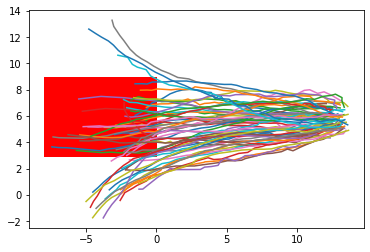

In [404]:
lst = []
fig, ax  = plt.subplots()
# ax.margins(0.05)
# i = 0
xy = np.array([-8,3])
rect = mpathes.Rectangle(xy,8,6,color='r')
for name, group in multi_trajs:
    
    if 30<=len(group) <=40:
#         if i == 1:
            lst.append(group)
            ax.plot(group.pos_x, group.pos_y, ms=1, label=name)
            ax.add_patch(rect)
#             break
#     break
#         i+=1
# plt.rcParams['figure.figsize'] = (15, 15)
# plt.show()
# plt.add_patch((-1,6),5,5)
len(lst)

In [405]:
x_noises = []
ped_to_pass = []
# print(len(lst))
count = 0
x_noises_real = []
for i in range(len(lst)):
    t = np.array(lst[i][['pos_x', 'pos_y']])[:,np.newaxis]

    x_noises_real += [t.reshape(t.shape[0], t.shape[2], t.shape[1])]
    
    if t[0,0,0] < t[-1,0,0]:
#         print("________________")
        t = t[::-1]
        count += 1
    t = t.reshape(t.shape[0], t.shape[2], t.shape[1])
    x_noises += [t]
    if -8<= t[-1,0,0]<= 0 and 3<= t[-1,1,0] <= 9:
        ped_to_pass += [t]
#     break
    
# print(len(x_noises))
print(f"ped to pass: {len(ped_to_pass)}")

ped to pass: 36


In [406]:
time_inteval = 0.4
# #状态转移方程
# A_l = np.eye(4) 
# t = np.eye(4, k=2) * time_inteval
# A_l = A_l + t
A_l = np.random.rand(2,2)
A_l

array([[0.87263115, 0.03834787],
       [0.41823407, 0.75666194]])

In [407]:
# C_l = np.eye(4,4)
C_l = np.random.rand(2,2)
C_l

array([[0.42071547, 0.51036278],
       [0.68842289, 0.9263284 ]])

In [408]:
#初始方差
# V_l =np.ones([4,4])
# V_l =np.diag(np.ones(2))
V_l = np.random.rand(2,2)
V_l

array([[0.81212955, 0.29089427],
       [0.07079523, 0.37022837]])

In [409]:
# Gamma_l = np.exp2(np.diag(np.random.rand(4)))
# Sigma_l = np.exp2(np.diag(np.random.rand(4)))
Gamma_l = np.exp2(np.diag(np.random.rand(2)))
Sigma_l = np.exp2(np.diag(np.random.rand(2)))
print(Gamma_l)
print(Sigma_l)

[[1.52560079 1.        ]
 [1.         1.8720991 ]]
[[1.62682695 1.        ]
 [1.         1.33488399]]


In [410]:
# mu_l = np.random.rand(4)[:,np.newaxis]
mu_l = np.random.rand(2)[:,np.newaxis]

mu_l

array([[0.05778529],
       [0.27355498]])

In [411]:
def inference(x_noises, mul_l, V_l, A_l, C_l, Gamma_l, Sigma_l) :
    
    def forward_kalman_gain_matrix(_P, C, Sigma):
        return _P @ C.transpose() @ np.linalg.inv(C @ _P @ C.transpose() + Sigma)

    def forward_update_P(A, V, Gamma):
        return A @ V @ A.transpose() + Gamma

    def forward_update_V(K, C, _P):
        return (np.eye(C.shape[-1]) - K @ C) @ _P

    def forward_update_mu(A, K, x, C, _mu):
        return A @ _mu + K @ (x - C @ A @ _mu)

    def forward_update_V_prior(K, C, _V):
        return (np.eye(C.shape[-1]) - K @ C) @ _V

    def forward_update_mu_prior(K, x, C, _mu):
#         print(x.shape)
#         print(C.shape)
#         print(_mu.shape)
        
        return _mu + K @ (x - C @ _mu)

    def forward_kalman_gain_matrix_prior(_V, C, Sigma):
        return _V @ C.transpose() @ np.linalg.inv(C @ _V @ C.transpose() + Sigma)
    
    forward_K = forward_kalman_gain_matrix_prior(_V=A_l @ V_l @ A_l.transpose() + Gamma_l, C=C_l, Sigma=Sigma_l)
    forward_mu = forward_update_mu_prior(K=forward_K, x=x_noises[0], C=C_l, _mu=mu_l)
    forward_V = forward_update_V_prior(K=forward_K, C=C_l, _V=V_l)
    forward_P = forward_update_P(A=A_l, Gamma=Gamma_l, V=forward_V)

    forward_mus = [forward_mu.copy()]
    forward_Vs = [forward_V.copy()]
    forward_Ps = [forward_P.copy()]
    
    for i in range(1, len(x_noises)):
        forward_K = forward_kalman_gain_matrix(_P=forward_P, C=C_l, Sigma=Sigma_l)
        forward_mu = forward_update_mu(A=A_l, K=forward_K, x=x_noises[i], C=C_l, _mu=forward_mu)
        forward_V = forward_update_V(K=forward_K, C=C_l, _P=forward_P)
        forward_P = forward_update_P(A=A_l, V=forward_V, Gamma=Gamma_l)

        forward_mus += [forward_mu.copy()]
        forward_Vs += [forward_V.copy()]
        forward_Ps += [forward_P.copy()]

    forward_mus = np.stack(forward_mus, axis=0)
    forward_Vs = np.stack(forward_Vs, axis=0)
    forward_Ps = np.stack(forward_Ps, axis=0)
    
    # compute smooth messages
    def smooth_update_mu(forward_mu, J, smooth_mu_, A):
        return forward_mu + J @ (smooth_mu_ - A @ forward_mu)

    def smooth_update_V(forward_V, J, smooth_V_, forward_P):
        return forward_V + J @ (smooth_V_ - forward_P) @ J.transpose()

    def smooth_update_J(forward_V, A, forward_P):
        return forward_V @ A.transpose() @ np.linalg.inv(forward_P)

    # t = T
    smooth_J = smooth_update_J(forward_V=forward_Vs[-1], A=A_l, forward_P=forward_Ps[-1])
    smooth_mu = forward_mus[-1]
    smooth_V = forward_Vs[-1]

    smooth_Js = [smooth_J.copy()]
    smooth_mus = [smooth_mu.copy()]
    smooth_Vs = [smooth_V.copy()]

    for t in reversed(range(1, x_noises.shape[0])):
        smooth_J = smooth_update_J(forward_V=forward_Vs[t], A=A_l, forward_P=forward_Ps[t])
        smooth_mu = smooth_update_mu(forward_mu=forward_mus[t], J=smooth_J, smooth_mu_=smooth_mu, A=A_l)
        smooth_V = smooth_update_V(forward_V=forward_Vs[t], J=smooth_J, smooth_V_=smooth_V, forward_P=forward_Ps[t])

        smooth_Js += [smooth_J.copy()]
        smooth_mus += [smooth_mu.copy()]
        smooth_Vs += [smooth_V.copy()]

    smooth_mus = np.stack(smooth_mus[::-1], axis=0)
    smooth_Vs = np.stack(smooth_Vs[::-1], axis=0)
    smooth_Js = np.stack(smooth_Js[::-1], axis=0)
    
#     print(f"smooth_mus shape: {smooth_mus.shape}")

    return forward_mus, forward_Vs[:, np.newaxis], forward_Ps[:, np.newaxis], smooth_mus, smooth_Vs[:,
                                                                                          np.newaxis], smooth_Js[:,
                                                                                                       np.newaxis]

    


In [412]:
def E_step(smooth_mus, smooth_Js, smooth_Vs):
    # from t=1 to t=T
    post_mean = smooth_mus
    # from t=2 to t=T
    post_dot_trans = smooth_Js[:-1] @ smooth_Vs[1:] + smooth_mus[1:] @ smooth_mus[:-1].transpose((0, 1, -1, -2))
#     print(f"before: {smooth_mus[:-1].shape} Transpose: {smooth_mus[:-1].transpose((0, 1, -1, -2)).shape}")
    # from t=1 to t=T
    post_dot = smooth_Vs + smooth_mus @ smooth_mus.transpose((0, 1, -1, -2))
    return post_mean, post_dot_trans, post_dot
def M_step(x_noise, post_mean, post_dot, post_dot_trans):
    mu_l = post_mean[0]

    V_l = post_dot[0] - post_mean[0] @ post_mean[0].transpose((0, -1, -2))

    T = x_noise.shape[0]

    A_l = post_dot_trans.sum(axis=0) @ np.linalg.inv(
        post_dot[:-1].sum(axis=0))

    Gamma_l = (post_dot[1:].sum(axis=0) - A_l @ post_dot_trans.transpose((0, 1, -1, -2)).sum(
        axis=0) - post_dot_trans.sum(
        axis=0) @ A_l.transpose((0, -1, -2)) + A_l @ post_dot[:-1].sum(axis=0) @ A_l.transpose((0, -1, -2))) / (T - 1)

    C_l = (x_noise @ post_mean.transpose((0, 1, -1, -2))).sum(axis=0) @ np.linalg.inv(post_dot.sum(axis=0))

    Sigma_l = ((x_noise @ x_noise.transpose((0, 1, -1, -2))).sum(axis=0)
               - C_l @ (post_mean @ x_noise.transpose((0, 1, -1, -2))).sum(axis=0)
               - (x_noise @ post_mean.transpose((0, 1, -1, -2))).sum(axis=0) @ C_l.transpose((0, -1, -2))
               + C_l @ post_dot.sum(axis=0) @ C_l.transpose((0, -1, -2))) / T
#     return mu_l, V_l, A_l, Gamma_l, C_l, Sigma_l
    return mu_l.mean(axis=0), V_l.mean(axis=0), A_l.mean(axis=0), Gamma_l.mean(axis=0), C_l.mean(axis=0), Sigma_l.mean(
        axis=0)

In [414]:
#Version 1. offline learning
def EM(x_noises, mu_l, V_l, A_l, Gamma_l, C_l, Sigma_l):
    itr_count = 0
    max_count = 50
    #学习率
    epsilon = 0.1
    #模型收敛条件
    param_diff = 1
    #画图频率
    plot_freq = 1
    
    A_l = np.diag(np.ones(2))
    C_l = np.diag(np.ones(2))
    V_l =np.random.rand(2,2)
    Gamma_l = np.exp2(np.diag(np.random.rand(2)))
    Sigma_l = np.exp2(np.diag(np.random.rand(2)))
    mu_l = np.random.rand(2)[:,np.newaxis]

    A_l_ = A_l.copy()
    C_l_ = C_l.copy()
    mu_l_ = mu_l.copy()
    V_l_ = V_l.copy()
    Sigma_l_ = Sigma_l.copy()
    Gamma_l_ = Gamma_l.copy()
    
    errors = []
    while itr_count < max_count and param_diff > epsilon:
#         print(f"A_L: {A_l}")
        
        forward_mus, forward_Vs, forward_Ps, smooth_mus, smooth_Vs, smooth_Js = inference(x_noises, mu_l, V_l, A_l, C_l, Gamma_l,
                                                                                          Sigma_l)
        # E-step
        post_mean, post_dot_trans, post_dot = E_step(smooth_mus, smooth_Js, smooth_Vs)

        # M-step
        mu_l, V_l, A_l, Gamma_l, C_l, Sigma_l = M_step(x_noises, post_mean, post_dot, post_dot_trans)
       

        itr_count += 1
        param_diff = np.abs(
            (A_l - A_l_).sum() + (C_l - C_l_).sum() + (mu_l - mu_l_).sum() + (V_l - V_l_).sum() + (
                    Sigma_l - Sigma_l_).sum() + (
                    Gamma_l - Gamma_l_).sum())

        A_l_ = A_l.copy()
        C_l_ = C_l.copy()
        mu_l_ = mu_l.copy()
        V_l_ = V_l.copy()
        Sigma_l_ = Sigma_l.copy()
        Gamma_l_ = Gamma_l.copy()
        if itr_count % plot_freq == 0:
            smooth_xs = C_l @ smooth_mus
            start_t = 20
            predict_mu_test = smooth_mus[start_t]
            predict_mus_test = [predict_mu_test]
            for t in range(smooth_mus.shape[0] - start_t - 1):
                predict_mu_test = A_l @ predict_mu_test
                predict_mus_test += [predict_mu_test]
            predict_mus_test = np.stack(predict_mus_test, axis=0)
            predict_smooth_xs = C_l @ smooth_mus[:start_t+1]
            bench_mark_smooth = C_l @ smooth_mus[start_t:]
            predict_xs = C_l @ predict_mus_test
            #画出图像，为了计算预测通过人数comment掉了，需要图时可comment回来
            batch_id = 0
#             plot_traj(x_noises[:, batch_id], smooth_xs[:, batch_id],
#                               predict_xs[:, batch_id], predict_smooth_xs[:, batch_id], bench_mark_smooth[:,batch_id], V_l)
#         (np.square(A - B)).mean(axis=ax)
        diff  = predict_xs[:, batch_id]-bench_mark_smooth[:,batch_id]
        diff = diff ** 2
        diff = diff.reshape(diff.shape[0], diff.shape[2], diff.shape[1])
        diff = diff.sum(axis=2)
        diff = np.sqrt(diff)
        error = diff.sum() / diff.shape[0]
        errors.append(error)
    plot_rmse(errors)
    #         print(f"pred: {predict_xs[:, batch_id][1]}, bench: { bench_mark_smooth[:,batch_id][1]}, diff: {diff}")
#         sum_error = np.square((predict_xs[:, batch_id]-bench_mark_smooth[:,batch_id])**2)
#         sum_error = sum_error.mean(axis=0)
#         print(sum_error)
    return A_l, C_l, mu_l, V_l, Sigma_l, Gamma_l, predict_xs

In [415]:
def plot_traj(x_noise, smooth_xs, predict_xs, predict_smooth_xs, bench_mark_smooth, V_l):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3.2))
    xy = np.array([-8,3])
    rect = mpathes.Rectangle(xy,8,6,color='r')
    # smoothing results
    radius = (2* np.sqrt(V_l[0,0]) + 2 * np.sqrt(V_l[1,1]))/2
    circle = mpathes.Circle((predict_xs[:,0,0][0],predict_xs[:,1,0][0]),radius=radius, fill = False)
    ax1.set(title="Smoothing")
    ax1.plot(x_noise[:, 0, 0], x_noise[:, 1, 0],
             'o-', color='lightgrey', label='noisy observation')
    ax1.plot(smooth_xs[:, 0, 0], smooth_xs[:, 1, 0],
             'o-', color='red', label='smoothed observation')
    ax2.set(title="Prediction")
    ax2.plot(x_noise[:, 0, 0], x_noise[:, 1, 0],
             'o-', color='lightgrey', label='noisy observation')
    ax2.plot(predict_xs[:, 0, 0], predict_xs[:, 1, 0],
             'o-', color='blue', label='predicted observation')
    ax2.plot(predict_smooth_xs[:, 0, 0], predict_smooth_xs[:, 1, 0],
             'o-', color='red', label='smoothed observation')
    ax2.plot(bench_mark_smooth[:, 0, 0], bench_mark_smooth[:, 1, 0],
             'o-', color='green', label='smoothed future')
    ax2.add_patch(rect)
    for i in range(len(predict_xs[:,0,0])):
        circle = mpathes.Circle((predict_xs[:,0,0][i],predict_xs[:,1,0][i]),radius=radius, fill = False)
        ax2.add_patch(circle)
    ax2.legend()

    plt.tight_layout()

    plt.pause(0.5)
    plt.close()


In [416]:
def plot_rmse(errors):
    min_y = np.argmin(errors)
    show_min = '[' + str(min_y) + ' ' + str(errors[min_y]) + ']'
    fig, ax  = plt.subplots()
    ax.plot(errors, ms = "1")
    ax.annotate(show_min, xy=(min_y, errors[min_y]), xytext = (min_y, errors[min_y]))

/tmp/ipykernel_19738/4221256516.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax  = plt.subplots()


predict ped to pass: 34


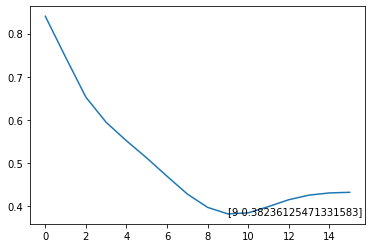

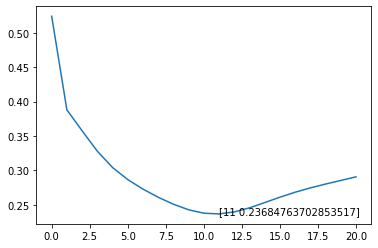

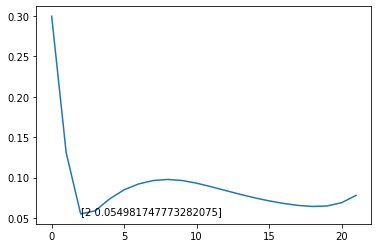

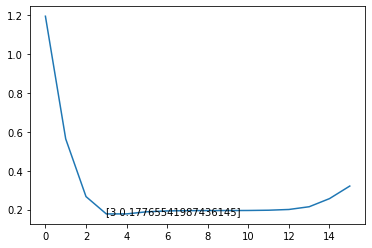

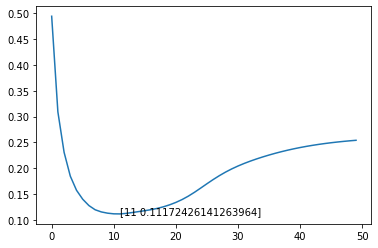

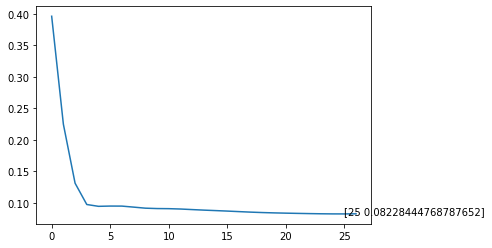

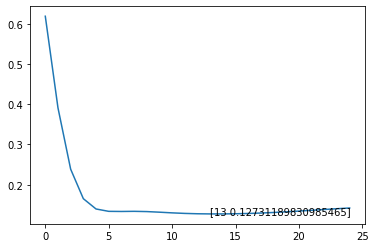

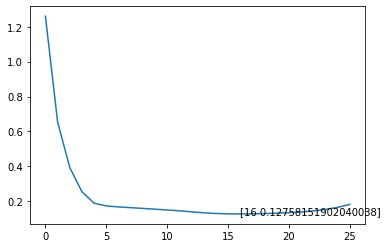

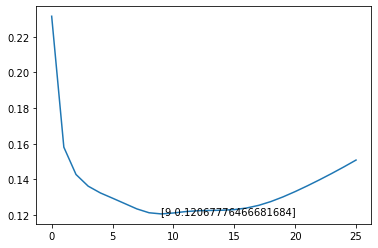

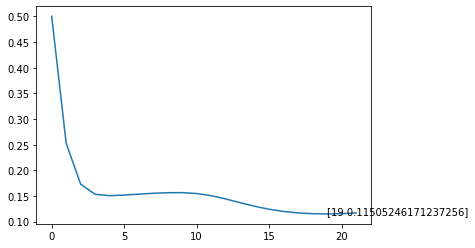

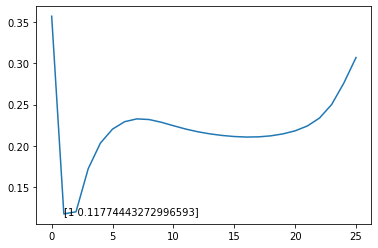

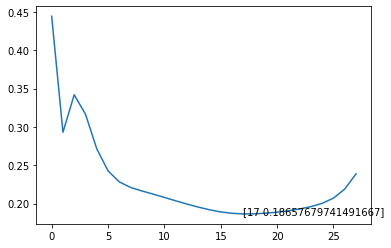

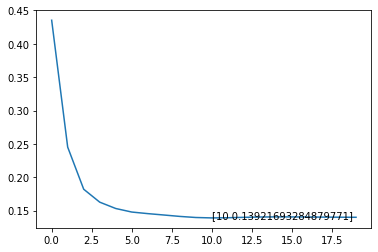

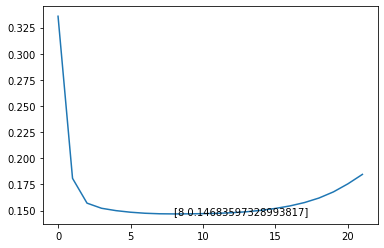

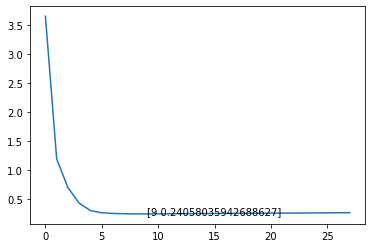

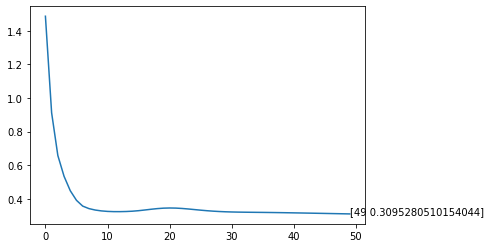

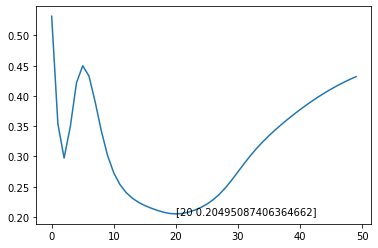

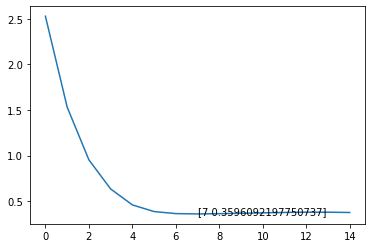

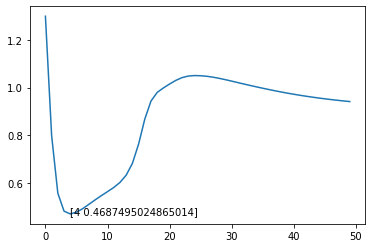

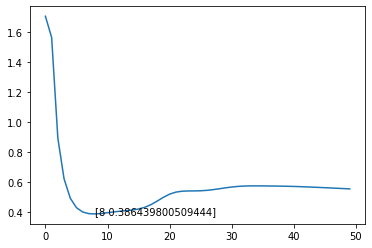

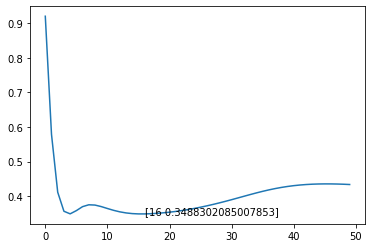

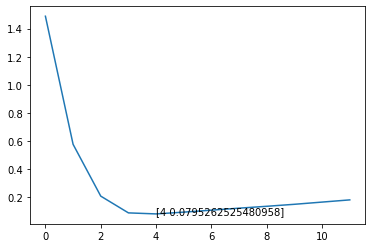

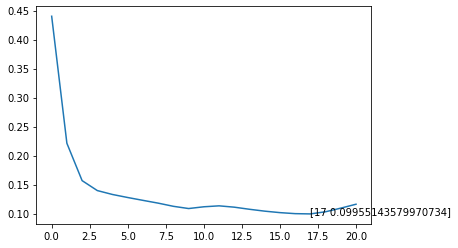

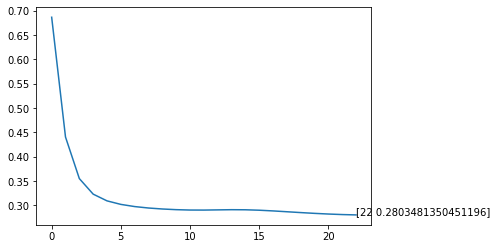

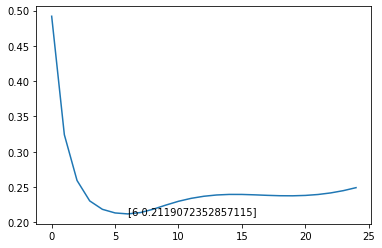

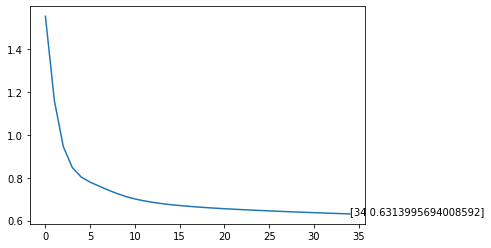

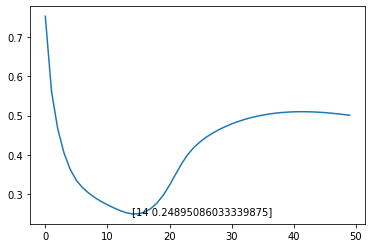

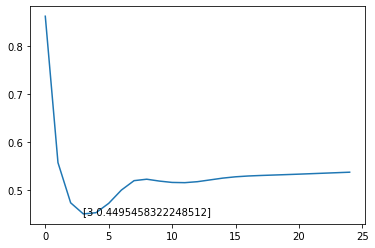

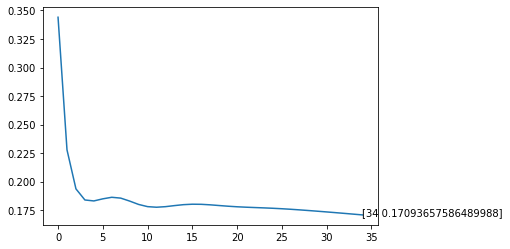

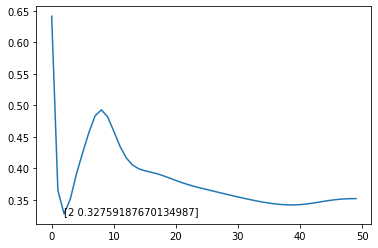

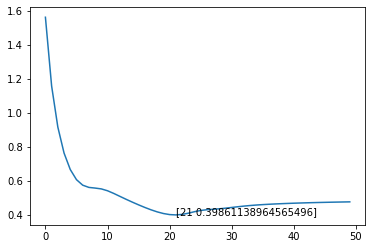

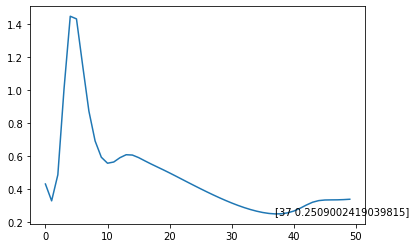

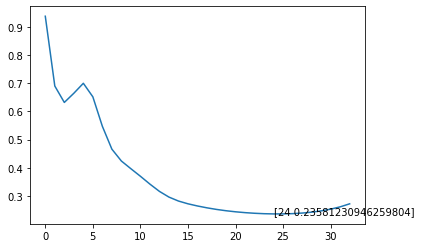

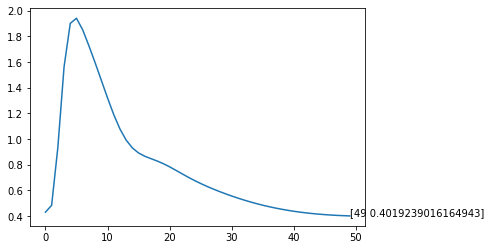

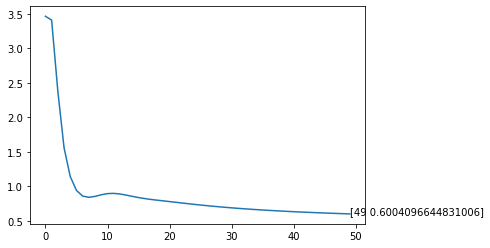

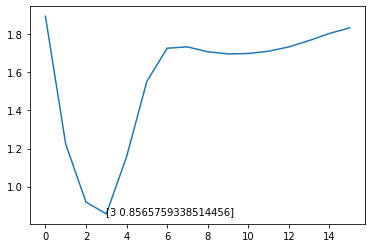

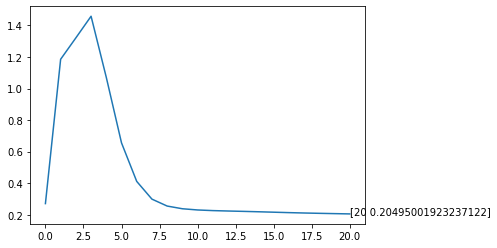

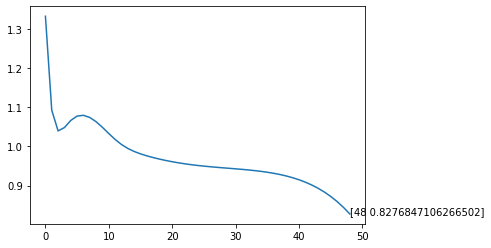

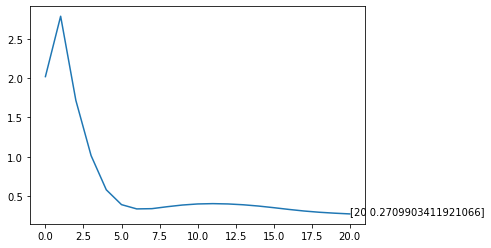

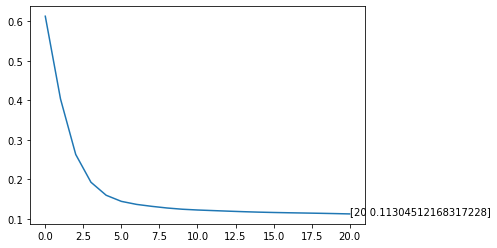

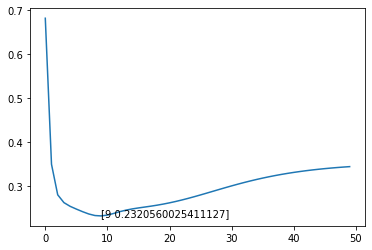

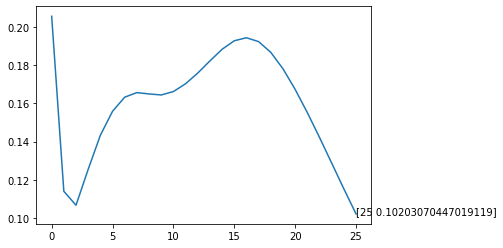

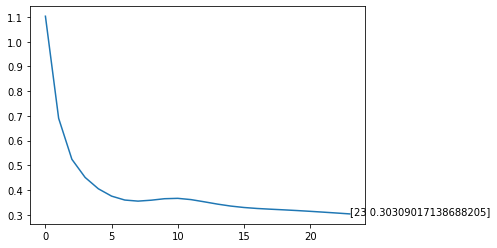

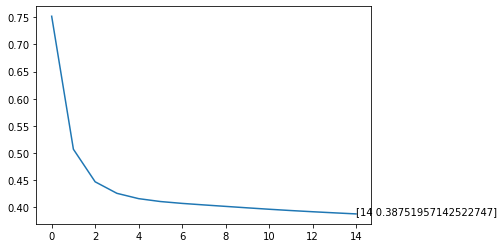

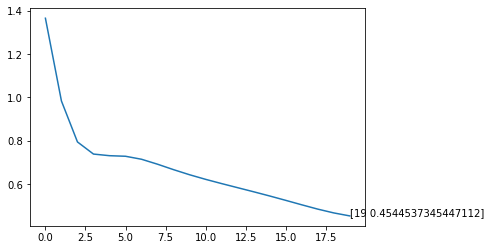

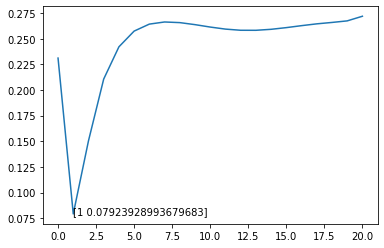

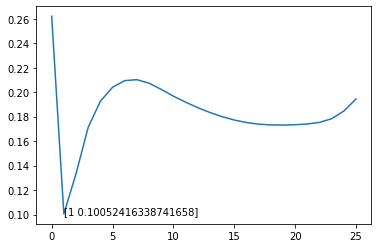

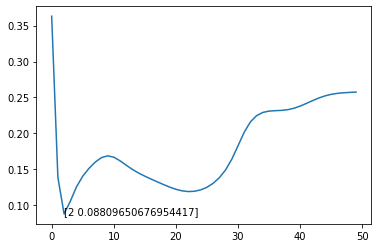

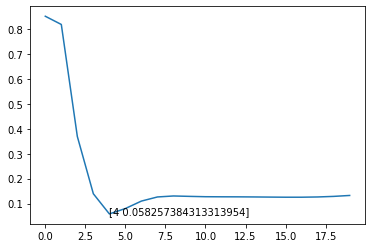

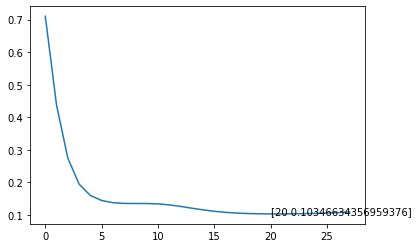

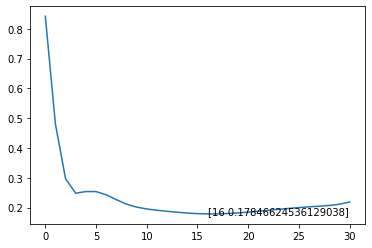

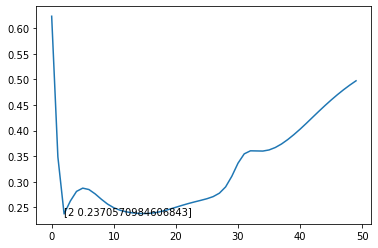

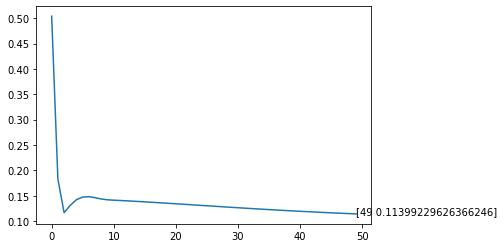

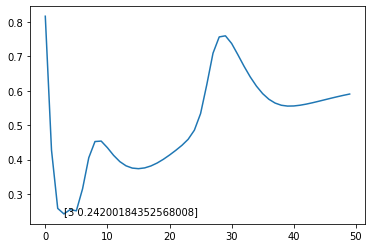

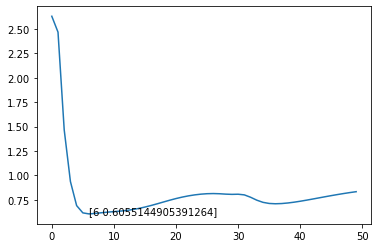

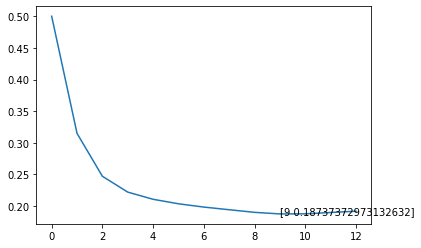

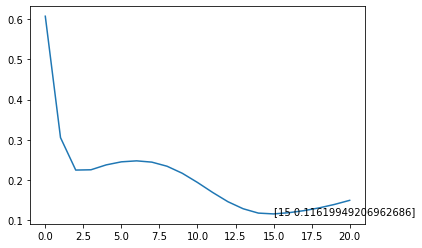

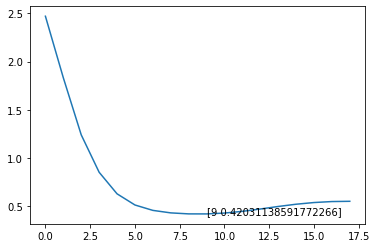

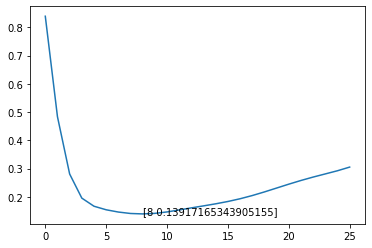

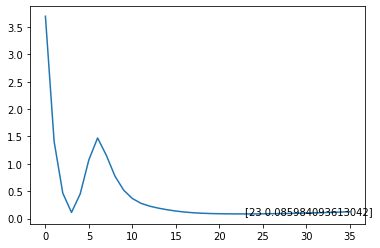

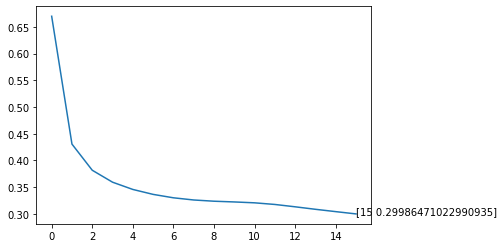

In [417]:
predict_ped_to_pass=[]
for i in range(len(x_noises)):

#     print(f"id: {i}")
    A_l, C_l, mu_l, V_l, Sigma_l, Gamma_l,predict_xs = EM(x_noises[i][:,np.newaxis], mu_l, V_l, A_l, Gamma_l, C_l, Sigma_l)
    predict_xs = predict_xs.reshape(predict_xs.shape[0], predict_xs.shape[2], predict_xs.shape[3])
    if -8<= predict_xs[-1,0,0]<= 0 and 3<= predict_xs[-1,1,0] <= 9:
        predict_ped_to_pass += [predict_xs]
print(f"predict ped to pass: {len(predict_ped_to_pass)}")

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

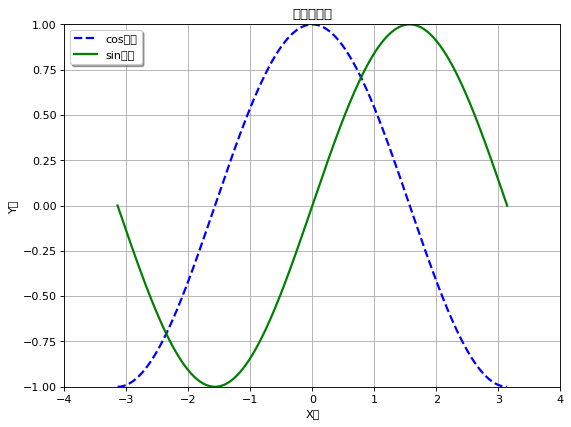

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

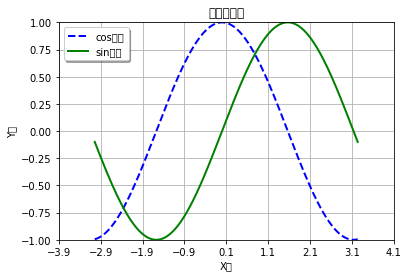

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

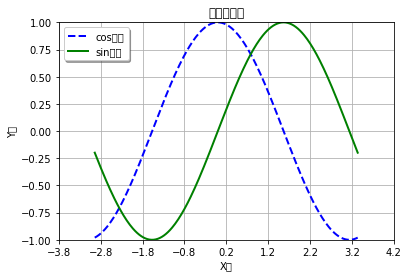

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

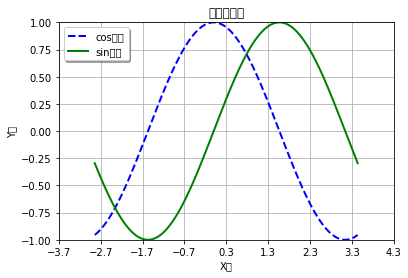

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

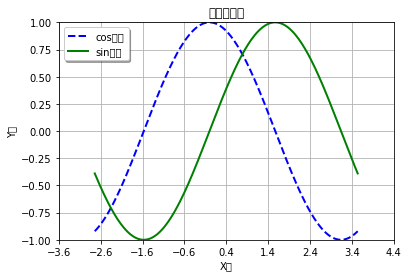

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

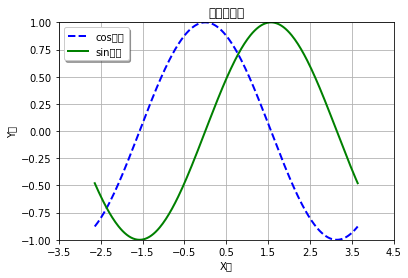

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

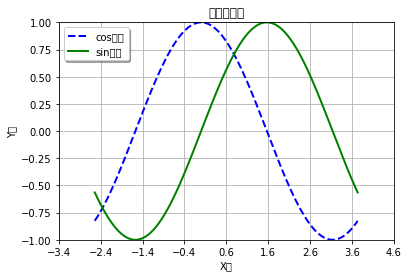

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

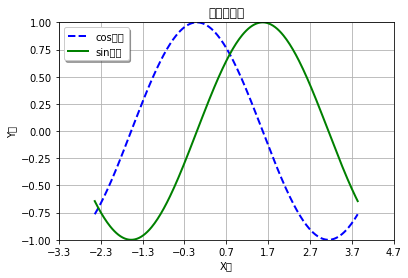

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

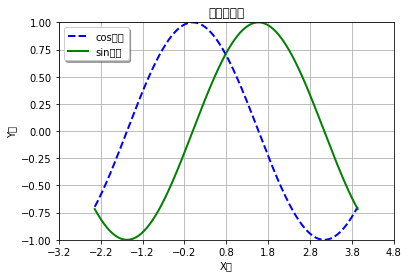

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

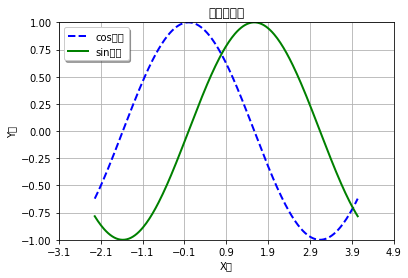

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

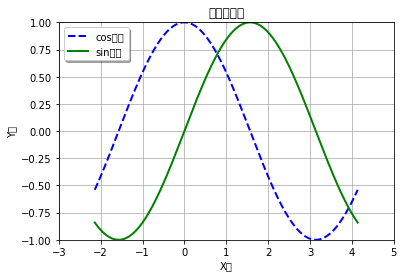

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

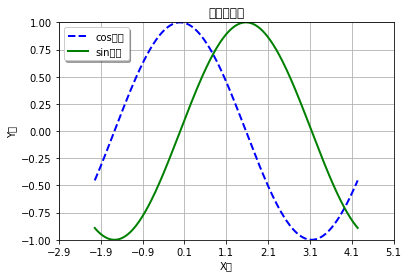

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

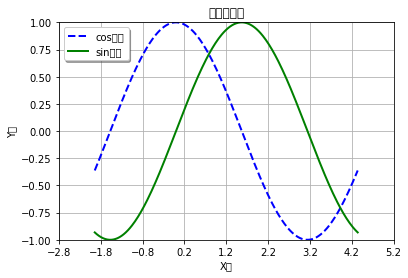

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

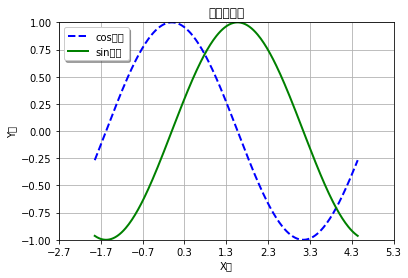

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

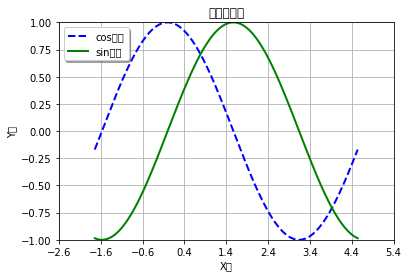

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

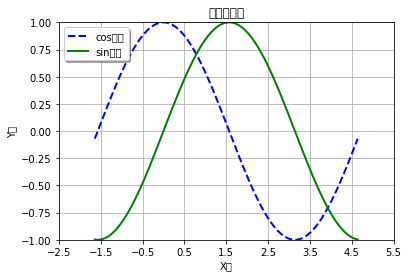

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

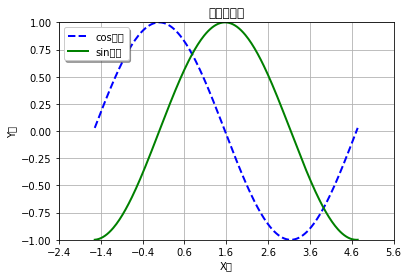

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

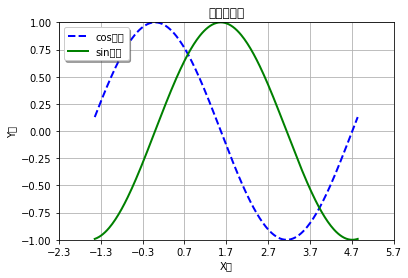

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

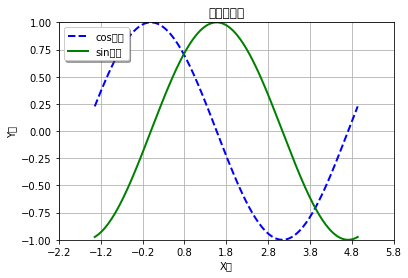

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

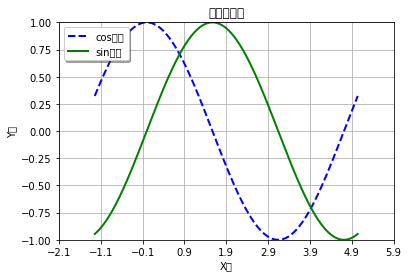

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

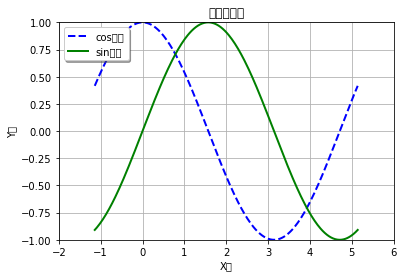

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

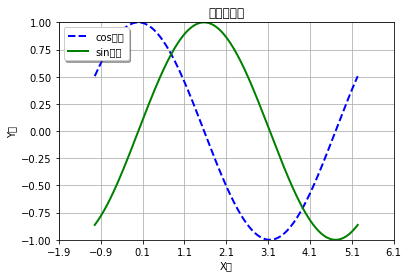

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

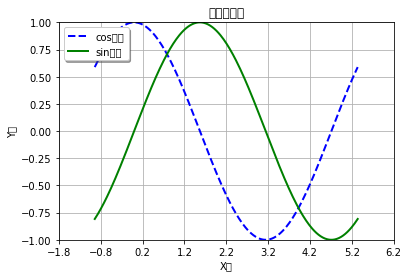

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

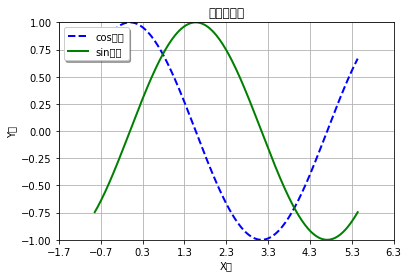

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

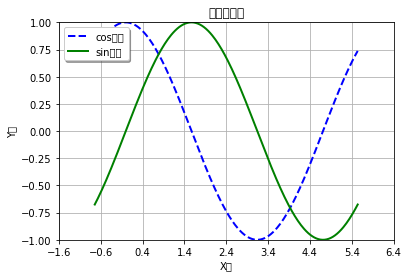

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

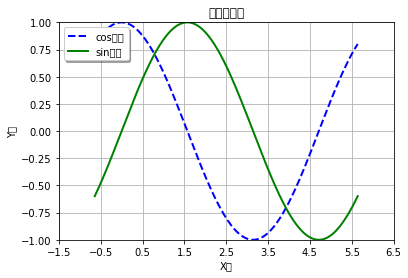

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

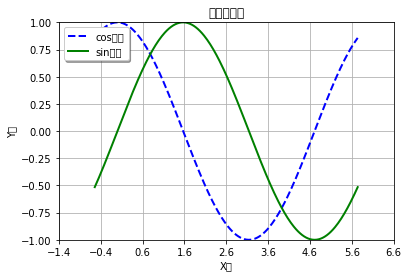

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

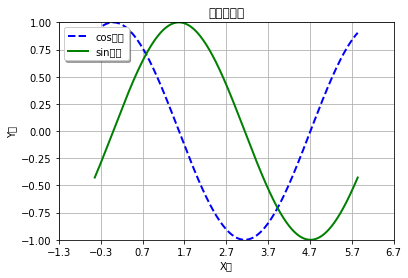

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

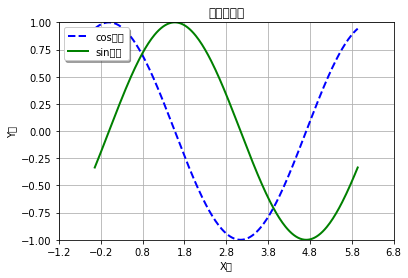

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

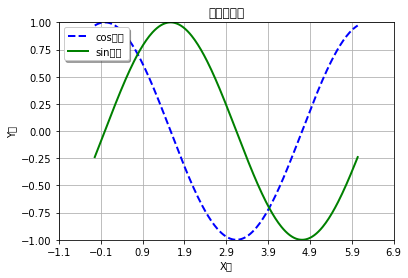

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

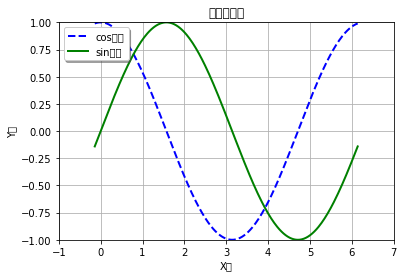

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

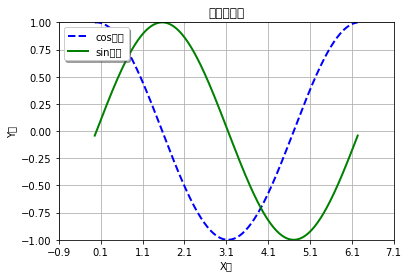

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

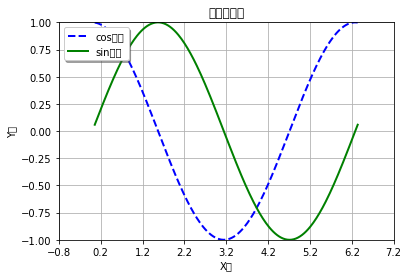

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

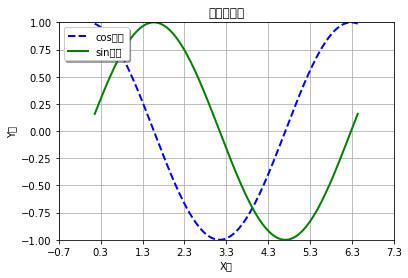

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

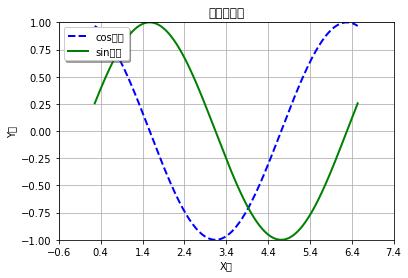

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

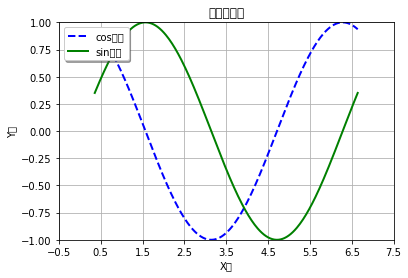

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

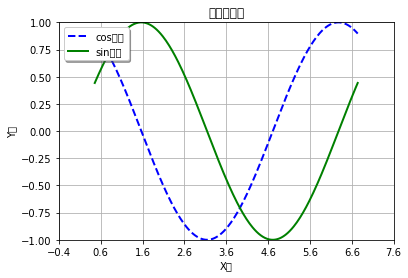

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

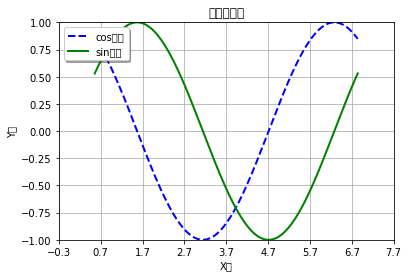

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

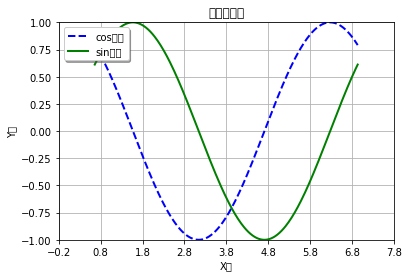

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

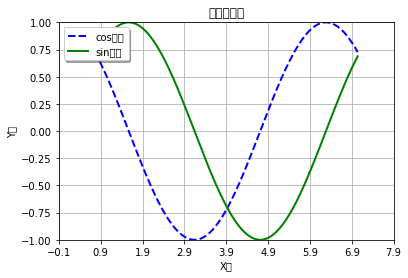

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

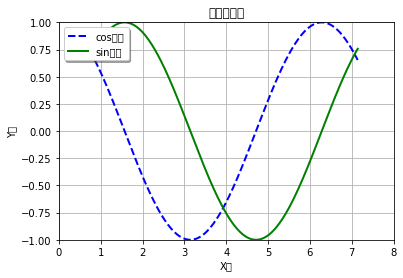

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

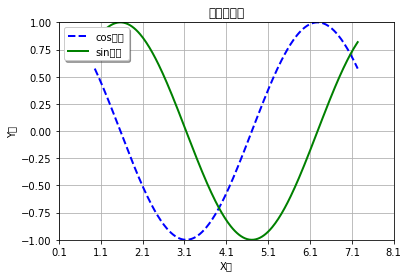

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

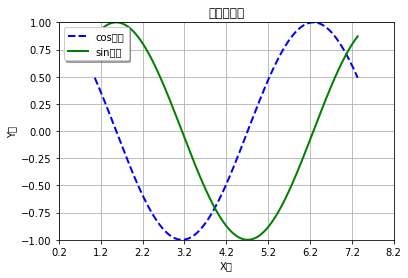

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

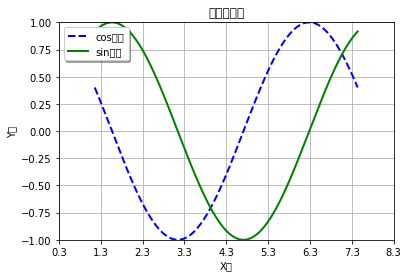

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

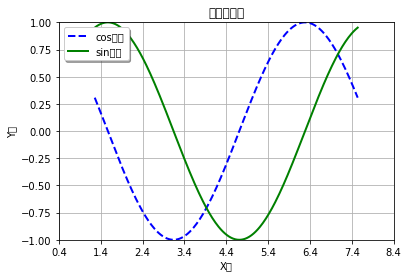

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

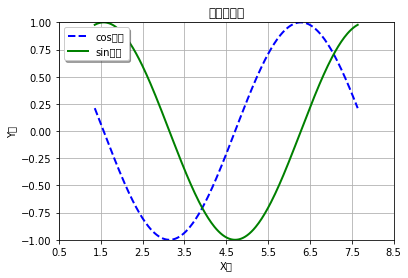

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

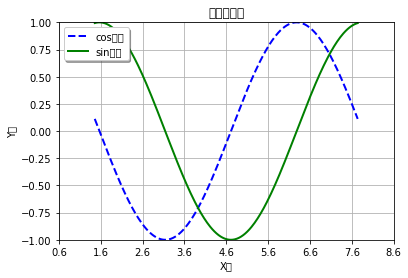

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

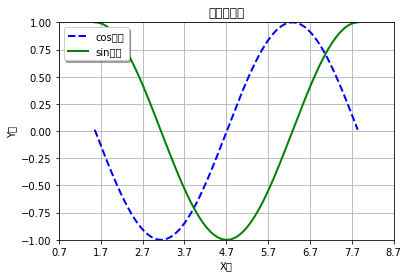

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

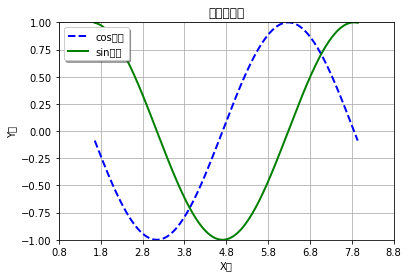

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

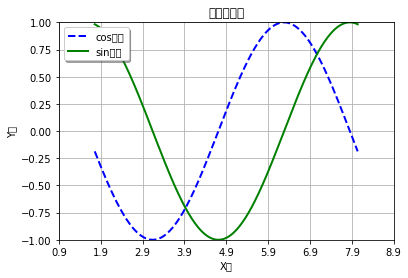

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

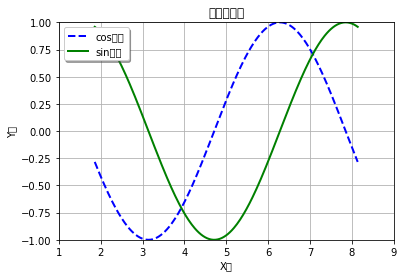

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

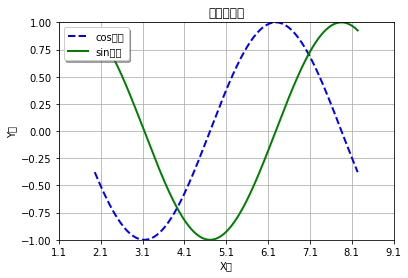

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

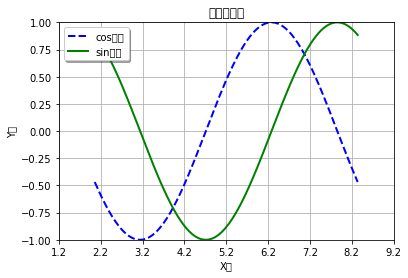

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

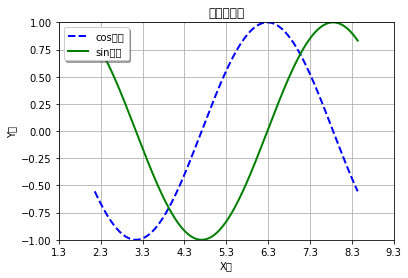

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

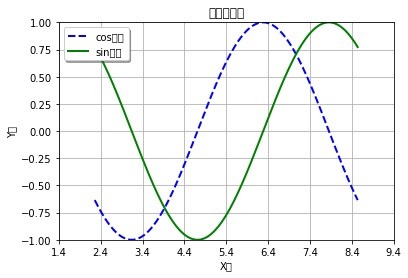

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

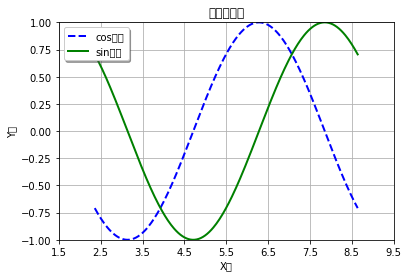

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

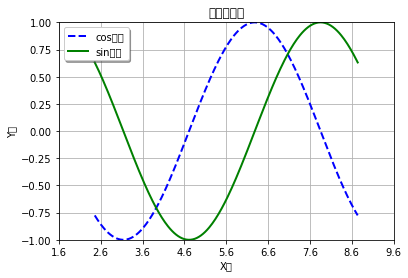

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

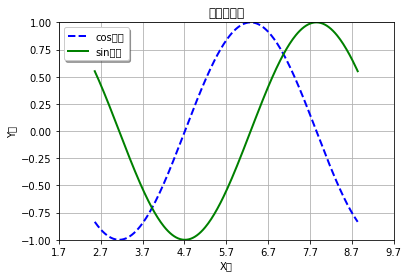

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

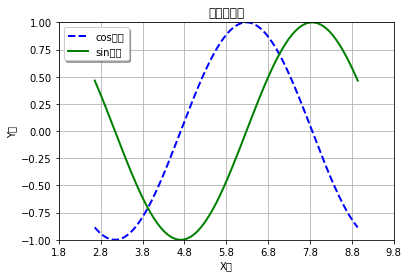

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

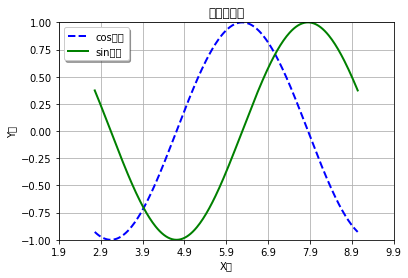

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

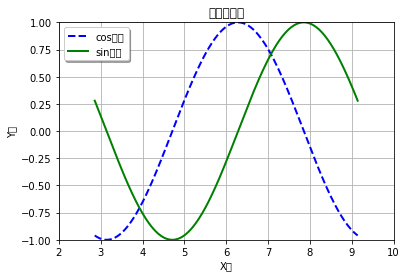

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

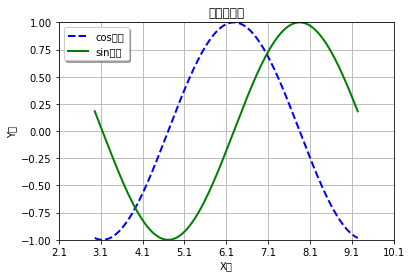

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

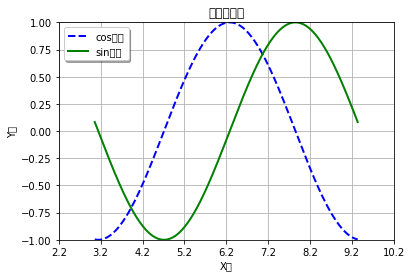

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

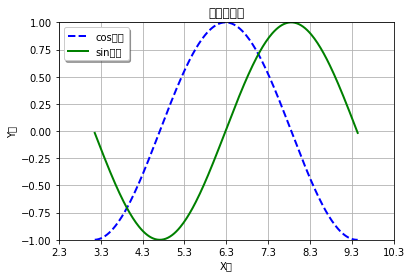

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

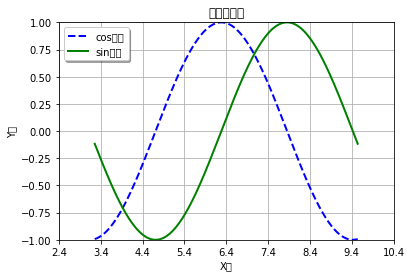

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

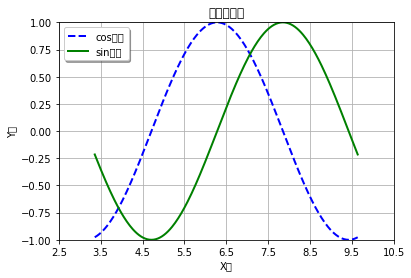

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

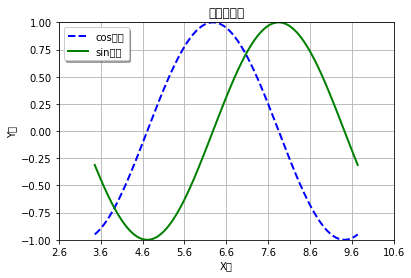

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

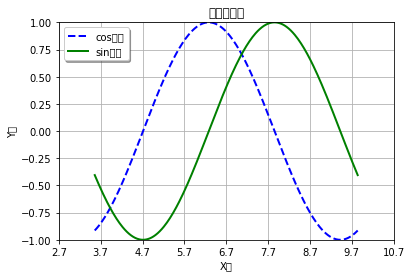

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

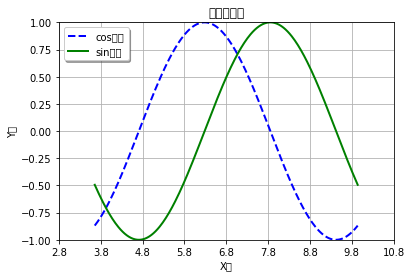

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

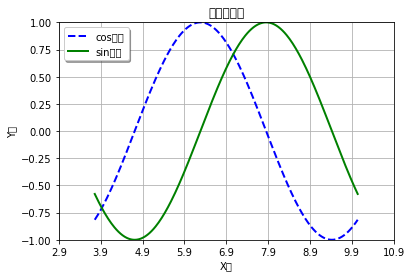

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

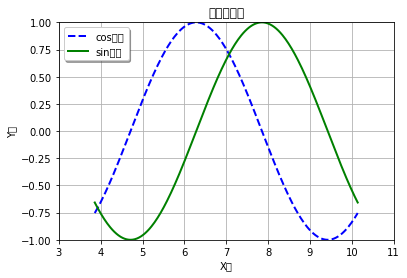

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

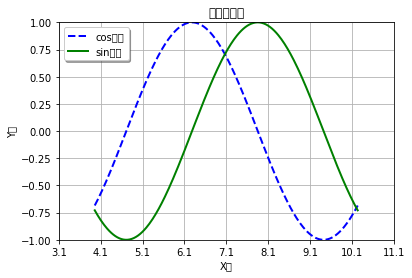

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

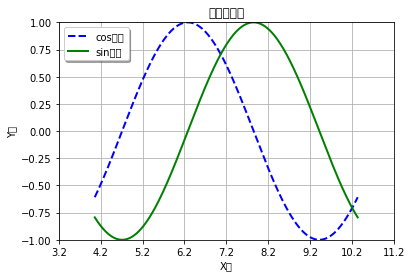

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

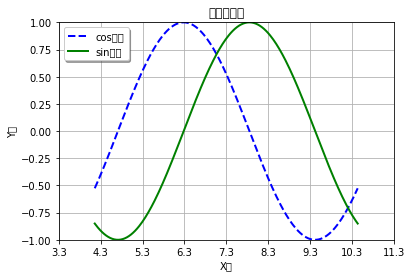

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

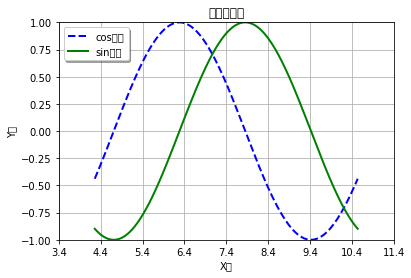

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

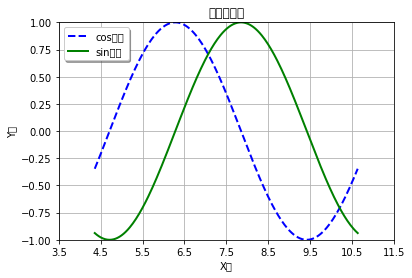

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

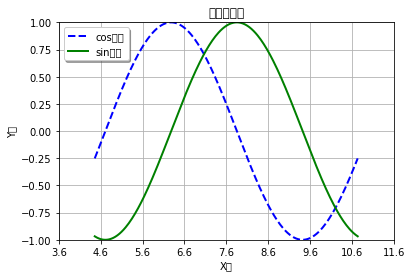

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

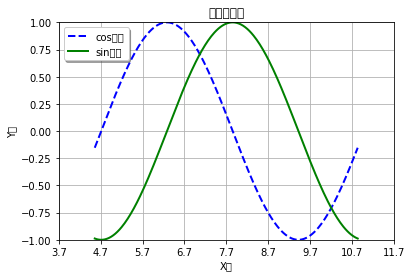

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

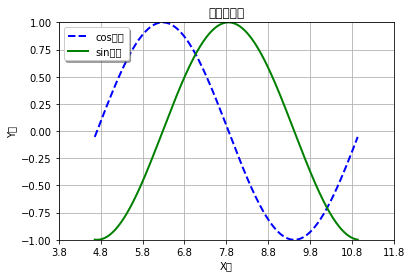

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

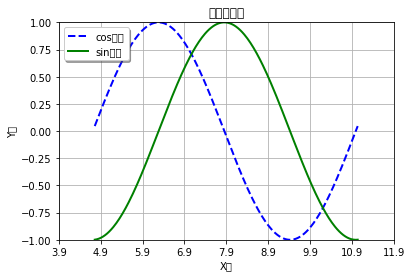

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

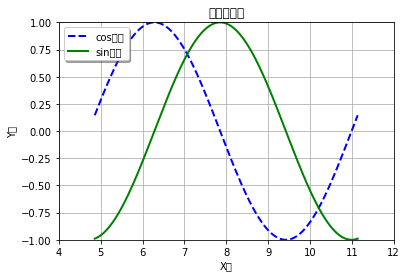

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

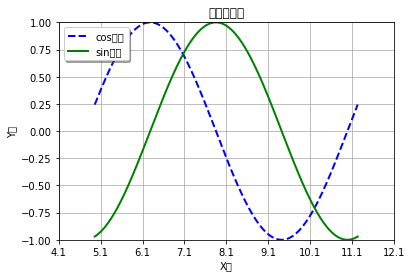

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

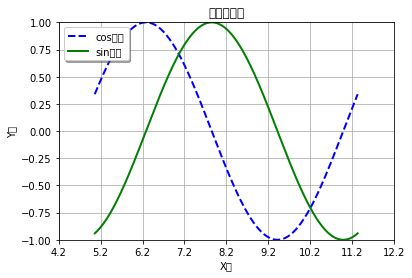

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

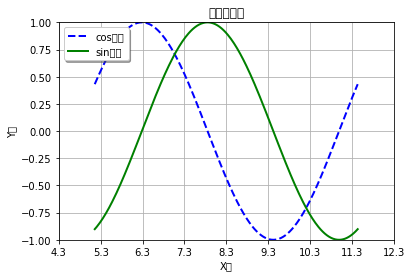

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

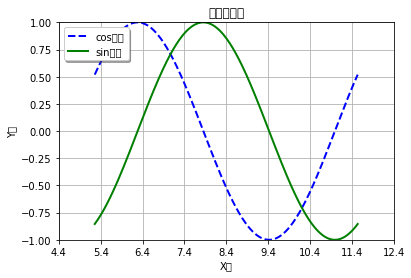

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

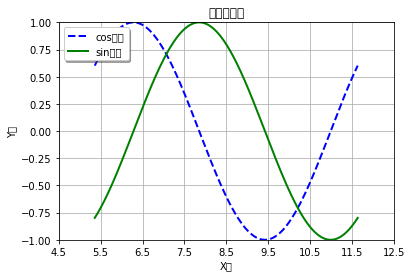

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

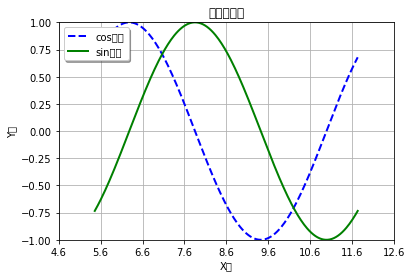

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

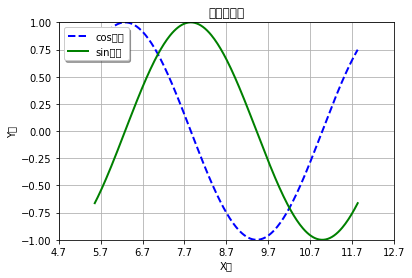

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

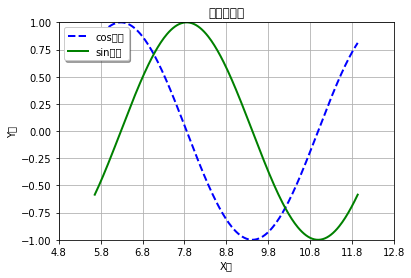

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

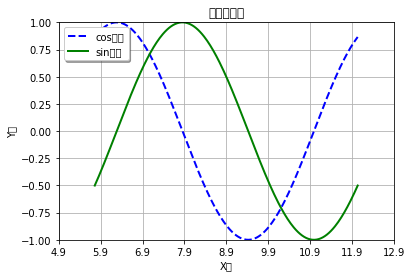

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

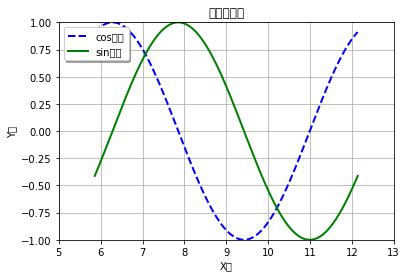

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

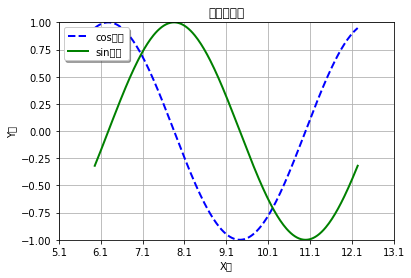

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

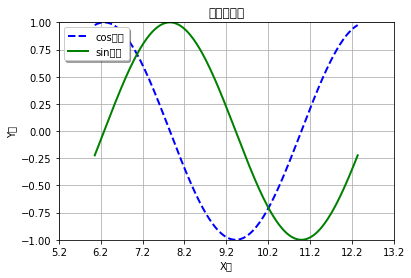

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

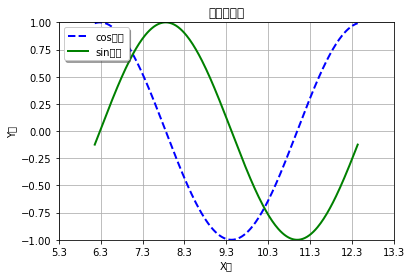

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

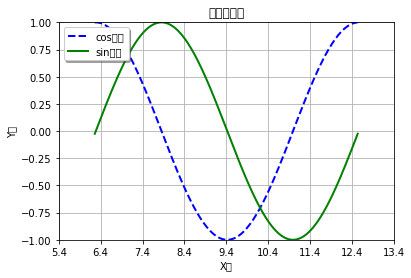

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

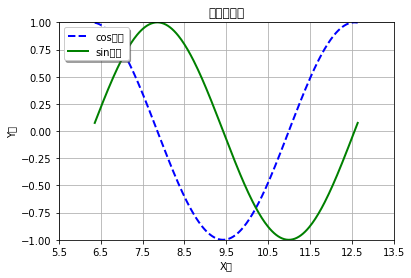

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

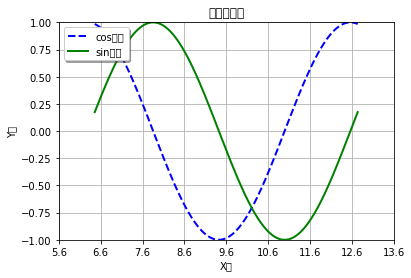

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

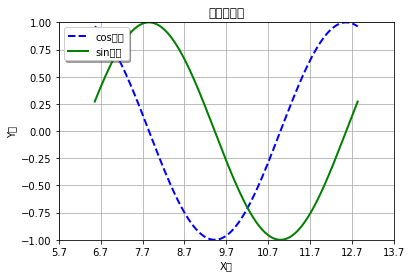

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

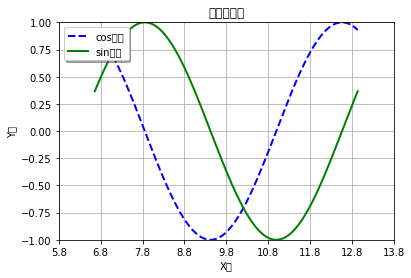

/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/2953892410.py:42: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  plt.pause(0.1)
/tmp/ipykernel_1345/

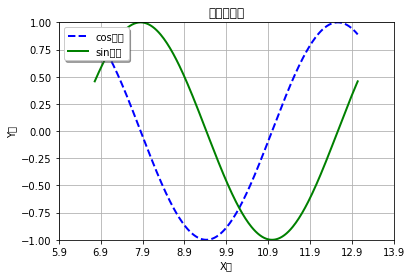

In [427]:
def simple_plot():
    """
    simple plot
    """
    # 生成画布
    plt.figure(figsize=(8, 6), dpi=80)

    # 打开交互模式
    plt.ion()

    # 循环
    for index in range(100):
        # 清除原有图像
        plt.cla()

        # 设定标题等
        plt.title("动态曲线图")
        plt.grid(True)

        # 生成测试数据
        x = np.linspace(-np.pi + 0.1*index, np.pi+0.1*index, 256, endpoint=True)
        y_cos, y_sin = np.cos(x), np.sin(x)

        # 设置X轴
        plt.xlabel("X轴")
        plt.xlim(-4 + 0.1*index, 4 + 0.1*index)
        plt.xticks(np.linspace(-4 + 0.1*index, 4+0.1*index, 9, endpoint=True))

        # 设置Y轴
        plt.ylabel("Y轴")
        plt.ylim(-1.0, 1.0)
        plt.yticks(np.linspace(-1, 1, 9, endpoint=True))

        # 画两条曲线
        plt.plot(x, y_cos, "b--", linewidth=2.0, label="cos示例")
        plt.plot(x, y_sin, "g-", linewidth=2.0, label="sin示例")

        # 设置图例位置,loc可以为[upper, lower, left, right, center]
        plt.legend(loc="upper left", shadow=True)

        # 暂停
        plt.pause(0.1)

    # 关闭交互模式
    plt.ioff()

    # 图形显示
    plt.show()
    return

simple_plot()

In [216]:
x_noises

[array([[[13.017548  ],
         [ 5.7825914 ]],
 
        [[12.08777   ],
         [ 5.751949  ]],
 
        [[11.746306  ],
         [ 5.7298146 ]],
 
        [[11.175158  ],
         [ 5.8362471 ]],
 
        [[10.43429   ],
         [ 5.8732028 ]],
 
        [[10.050254  ],
         [ 6.1714868 ]],
 
        [[ 9.5712958 ],
         [ 6.2373547 ]],
 
        [[ 9.0840742 ],
         [ 6.2638361 ]],
 
        [[ 8.5527509 ],
         [ 6.3740273 ]],
 
        [[ 8.0978874 ],
         [ 6.4810373 ]],
 
        [[ 7.6353672 ],
         [ 6.5483408 ]],
 
        [[ 7.1670909 ],
         [ 6.616482  ]],
 
        [[ 6.7341728 ],
         [ 6.6414608 ]],
 
        [[ 6.3426199 ],
         [ 6.7058853 ]],
 
        [[ 5.9914678 ],
         [ 6.7683596 ]],
 
        [[ 5.5973695 ],
         [ 6.9181861 ]],
 
        [[ 5.2394674 ],
         [ 6.9822277 ]],
 
        [[ 5.0151027 ],
         [ 7.0384316 ]],
 
        [[ 4.7975924 ],
         [ 7.2222416 ]],
 
        [[ 4.5440437 ],
       

In [245]:
df = pd.DataFrame(x_noises[0].reshape(x_noises[0].shape[0], x_noises[0].shape[1]))
df.insert(0, 'id', [1]*len(x_noises[0]))

for i in range(1, len(x_noises)):
    _df = pd.DataFrame(x_noises[i].reshape(x_noises[i].shape[0], x_noises[i].shape[1]))
    _df.insert(0, 'id',[i+1] *len(x_noises[i]))
    df = pd.concat([df, _df], axis=0)

In [250]:
df.rename(columns={0:'pos_x', 1:'pos_y'}, inplace =True)

In [251]:
df

id      pos_x      pos_y
0    1  13.017548   5.782591
1    1  12.087770   5.751949
2    1  11.746306   5.729815
3    1  11.175158   5.836247
4    1  10.434290   5.873203
..  ..        ...        ...
29  61  -3.064910  11.397107
30  61  -3.425941  11.713070
31  61  -3.906133  11.998179
32  61  -4.334492  12.279600
33  61  -4.819157  12.616493

[2000 rows x 3 columns]

In [255]:
df.to_csv('cleaned_pedestrian_trajs.csv', index=False)

In [766]:
pwd

'/home/xli149/Documents/CS5340-project/project-5340'

In [256]:
V_l

array([[ 0.00703714, -0.00959657],
       [-0.00950497,  0.02107617]])